In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

C:\Users\amitg\AppData\Local\Temp\ipykernel_20048\1734793528.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
folder = "results/"
graphs = [
    "graph_powerlaw_cluster_graph_n5",
    "graph_powerlaw_cluster_graph_n6",
]

In [3]:
def get_df(graph):
    df = pd.read_csv(f"{folder}rank_effect_by_node_{graph}.csv")
    df['CVF (Avg)'] = df['CVF In (Avg)'] + df['CVF Out (Avg)']
    df['CVF (Max)'] = df['CVF In (Max)'] + df['CVF Out (Max)']
    return df

In [4]:
def plot_node_rank_effect(node, df, ax):
    sns.lineplot(data=df, x='Rank Effect', y='CVF (Avg)', ax=ax)
    ax.set(xlabel=f"Rank Effect of Node: {node}", ylabel="Count")
    ax.set_title("CVF Avg")
    ax.set_yscale('log')


def plot_node_rank_effect_max(node, df, ax):
    sns.lineplot(data=df, x='Rank Effect', y='CVF (Max)', ax=ax)
    ax.set(xlabel=f"Rank Effect of Node: {node}", ylabel="Count")
    ax.set_title("CVF Max")
    ax.set_yscale('log')

In [5]:
# for graph in graphs:
#     df = get_df(graph)
#     node_grps = df.groupby(['Node'])
#     fig, axs = plt.subplots(node_grps.ngroups, 2, figsize=(12, 20), constrained_layout=True)
#     fig.suptitle(f'{graph}', fontsize=16)
    
#     for i, (index, grp) in enumerate(node_grps):
#         plot_node_rank_effect(index[0], grp, axs[i][0])
#         plot_node_rank_effect_max(index[0], grp, axs[i][1])

In [6]:
# df['CVF Neg cost (Avg)'] = df.apply(lambda x: x['Rank Effect'] * x['CVF (Avg)'] if x['Rank Effect'] < 0 else 0, axis=1)
# df['CVF Pos cost (Avg)'] = df.apply(lambda x: x['Rank Effect'] * x['CVF (Avg)'] if x['Rank Effect'] > 0 else 0, axis=1)
# df.head()

In [7]:
# cvf_neg_cost = df.groupby(['Node'])['CVF Neg cost (Avg)'].agg('sum').apply(lambda val: -val)
# cvf_neg_cost = cvf_neg_cost.to_frame().reset_index()
# cvf_neg_cost

In [8]:
# sns.histplot(data=cvf_neg_cost, x='Node', y='CVF Neg cost')

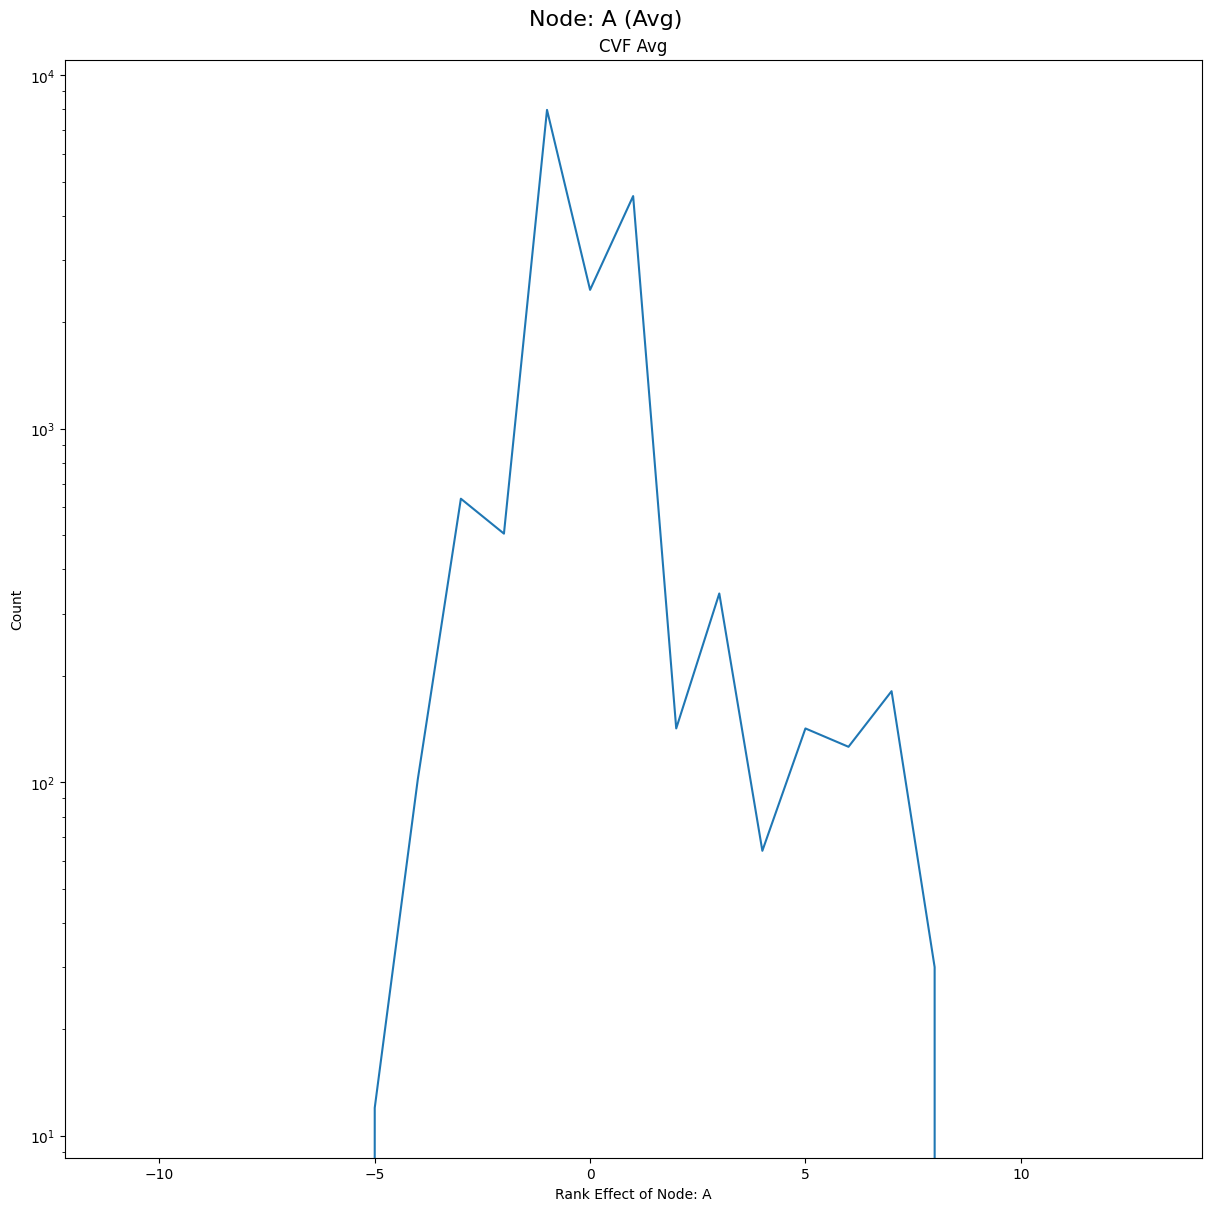

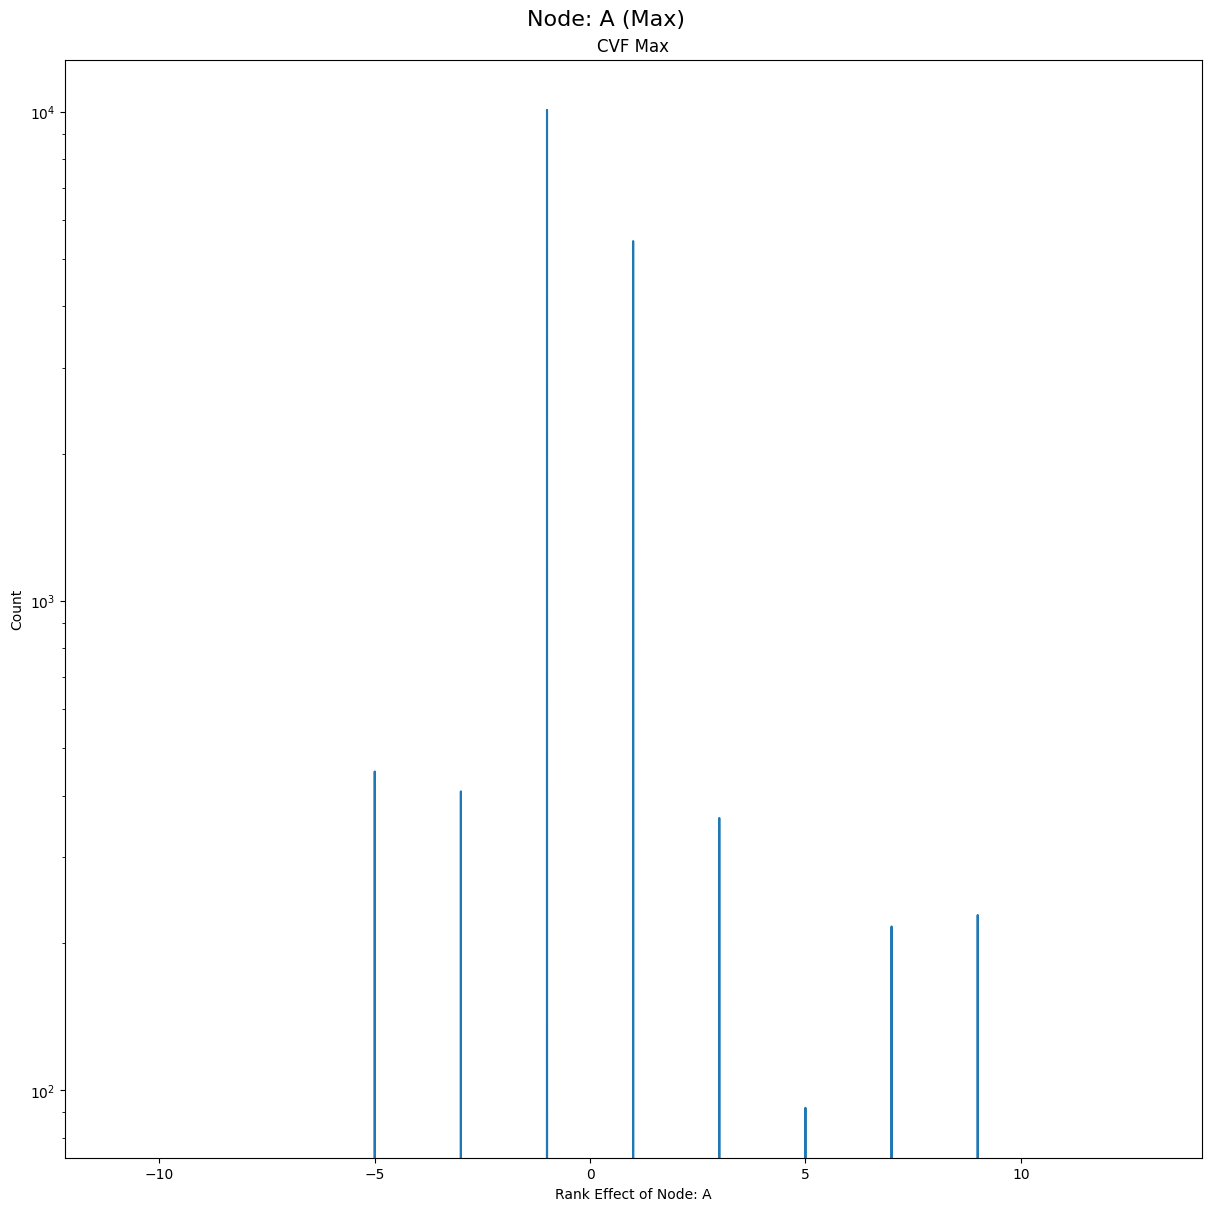

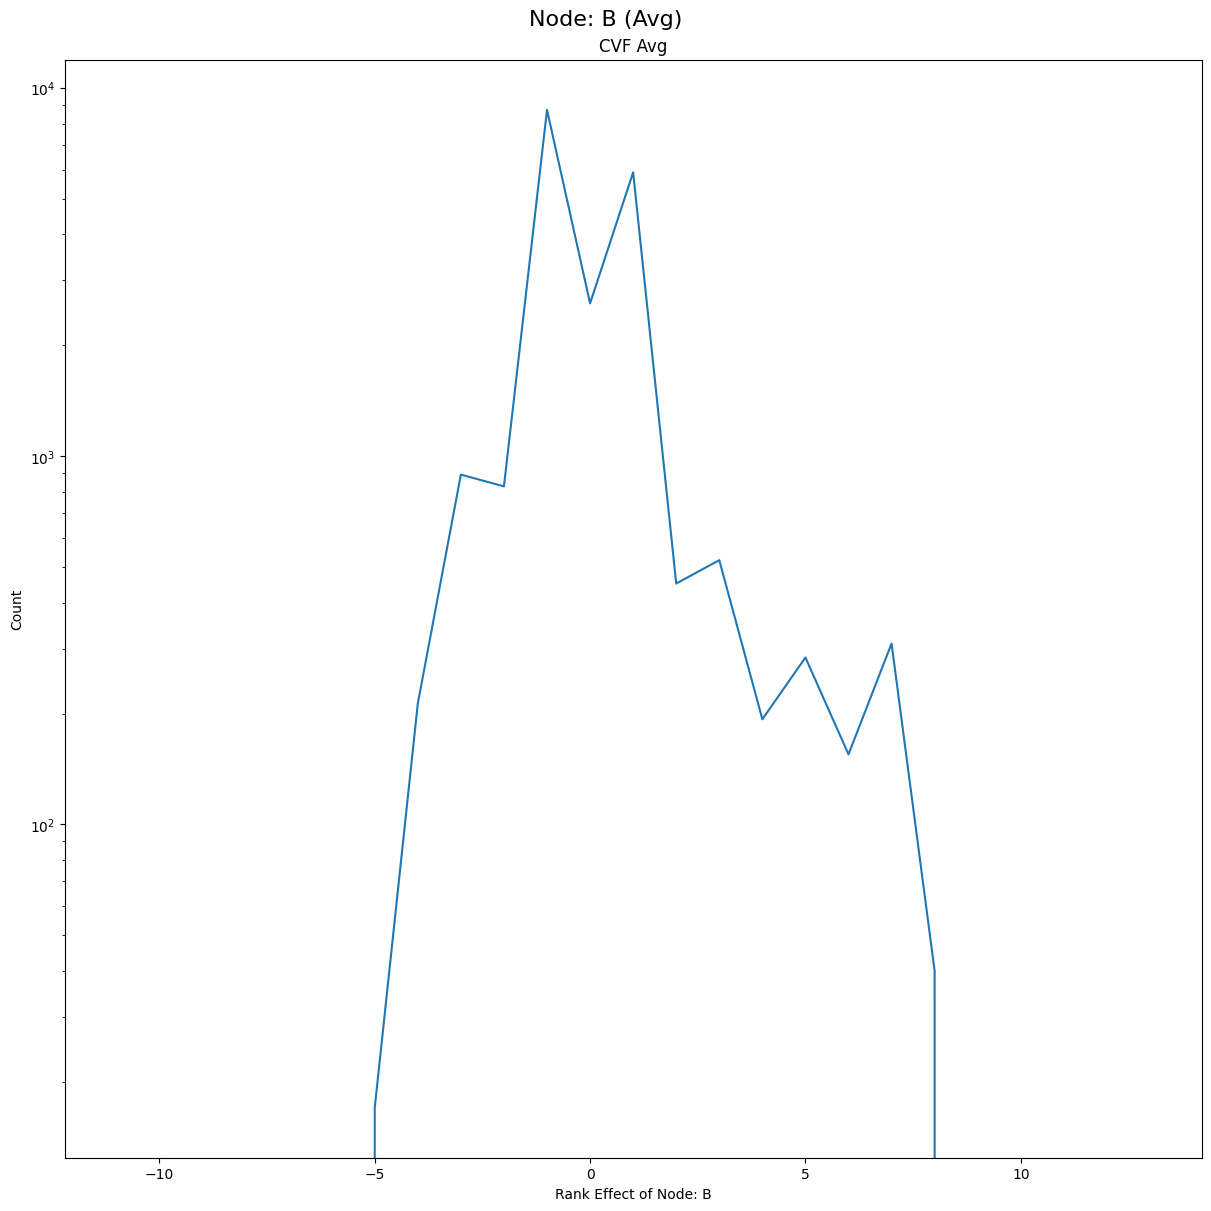

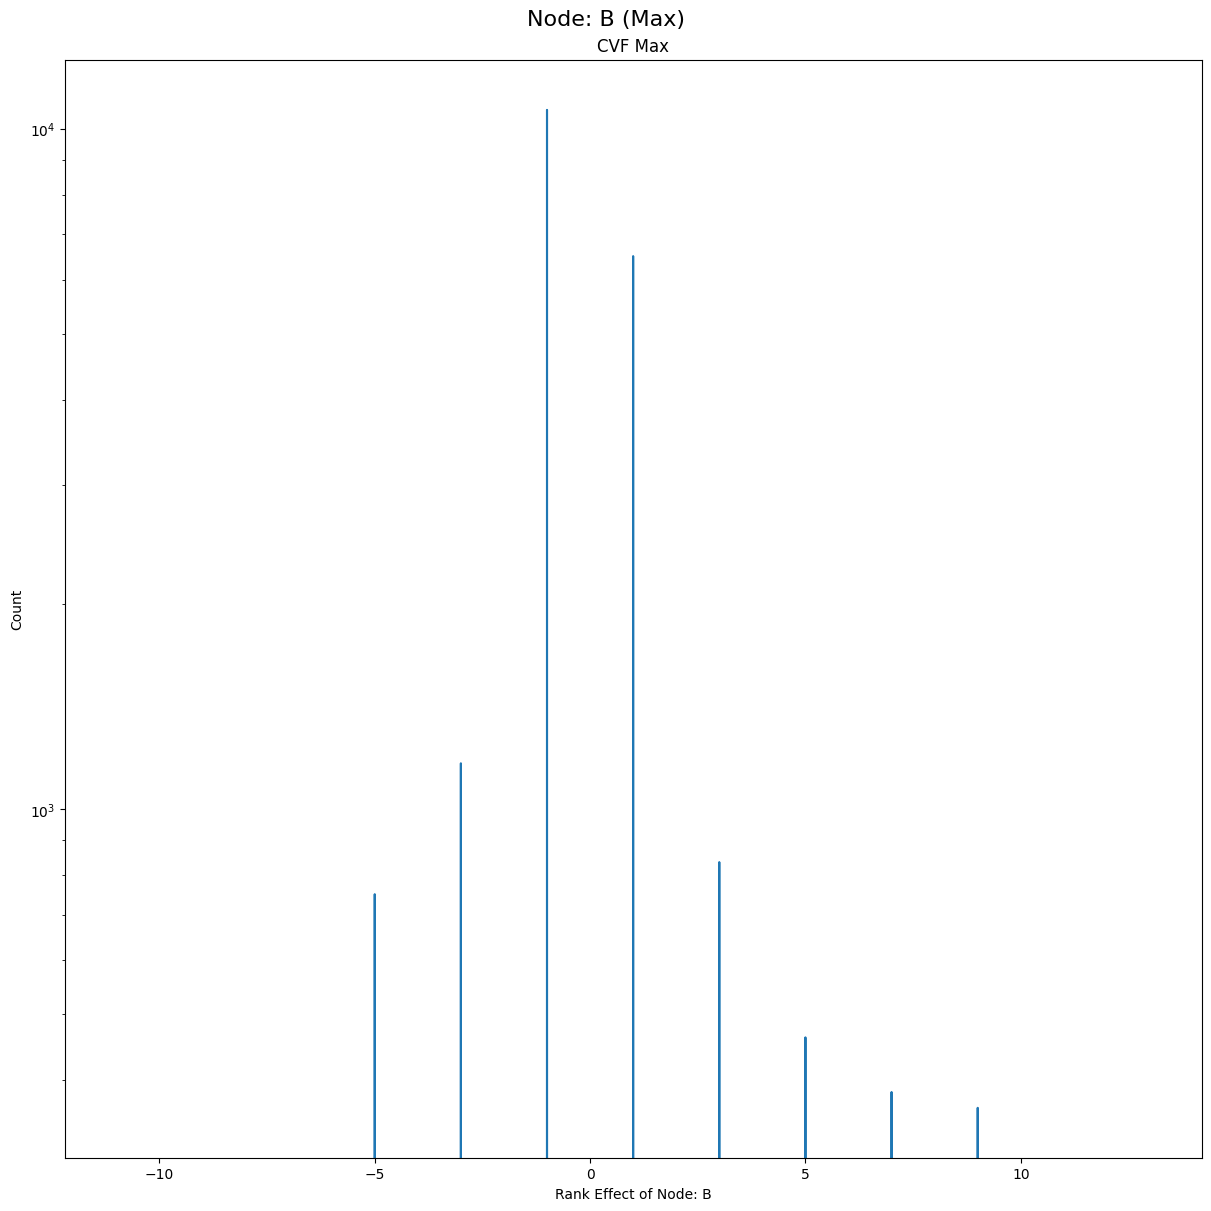

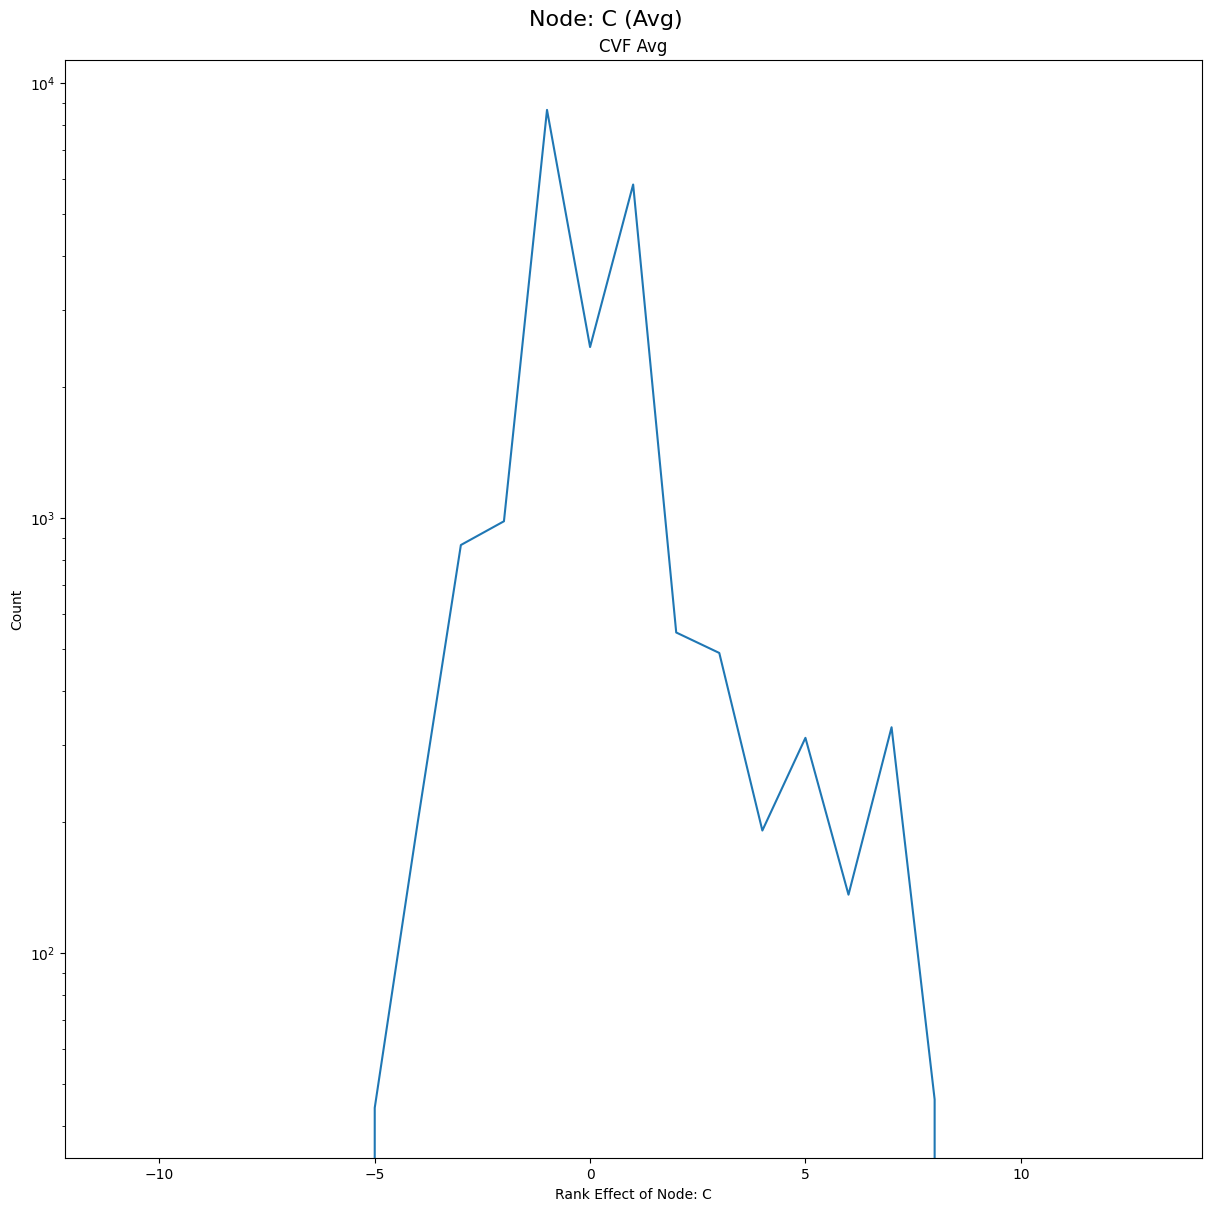

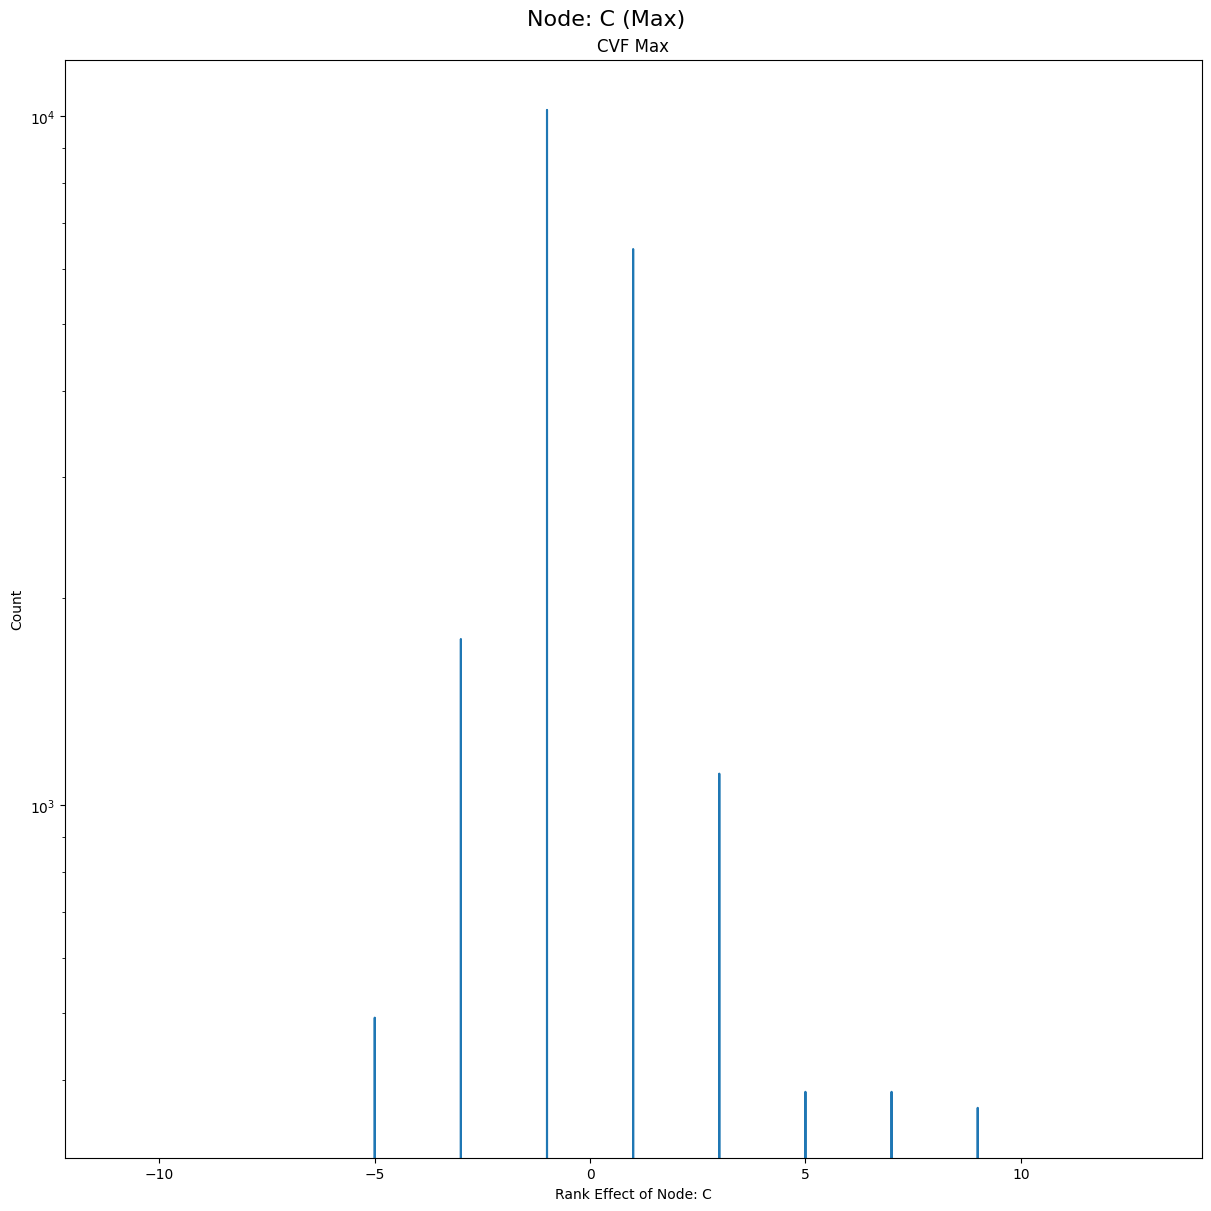

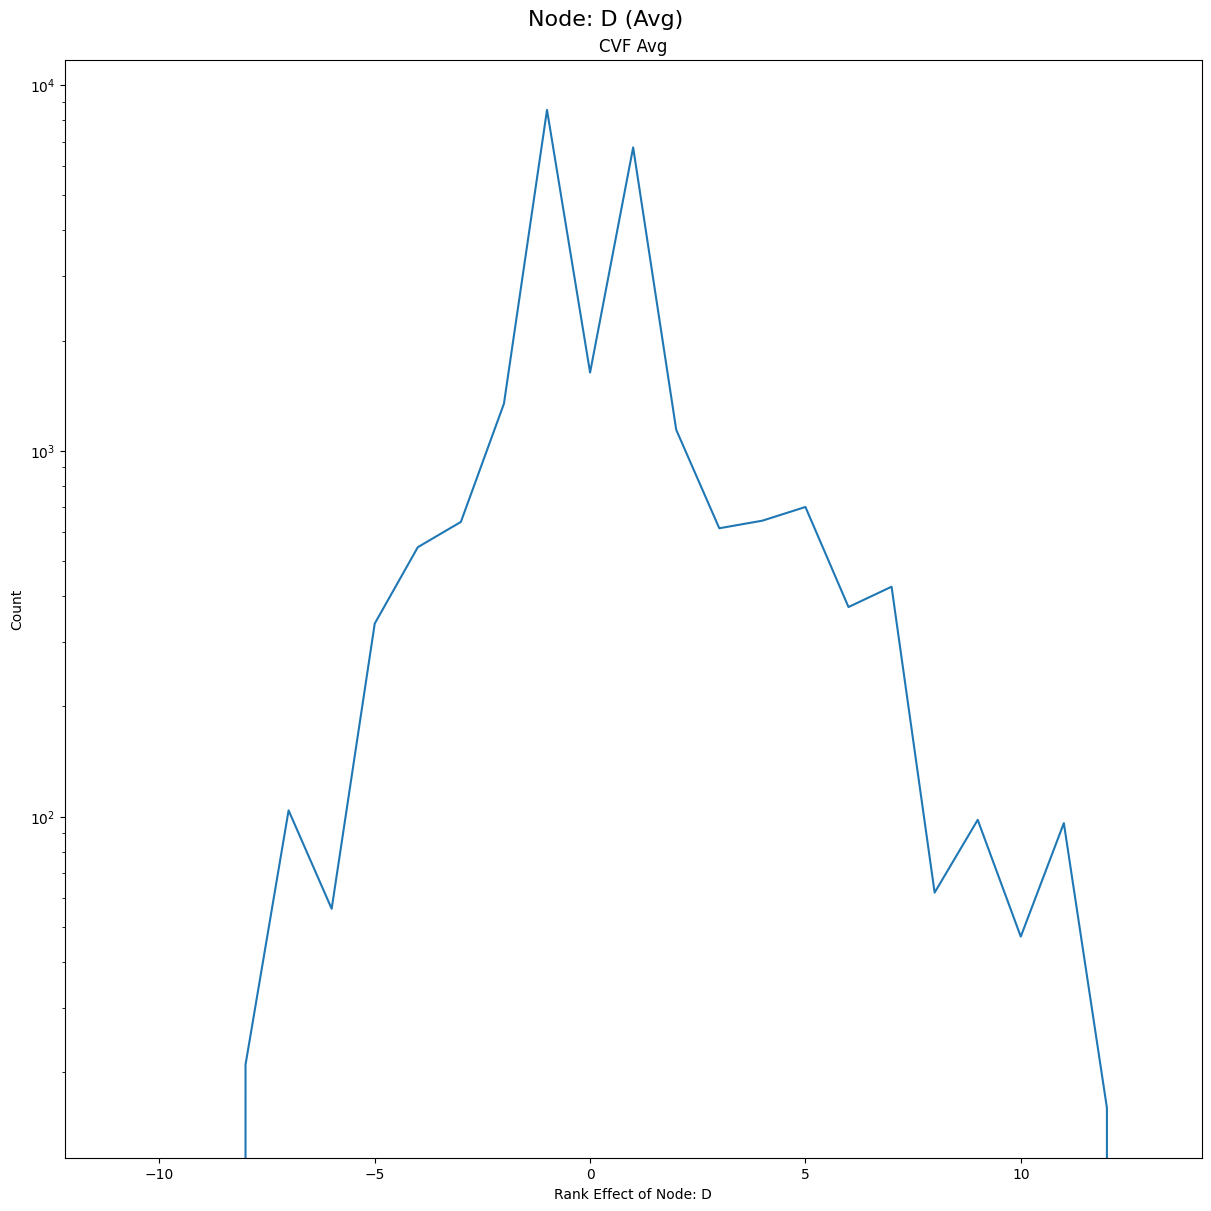

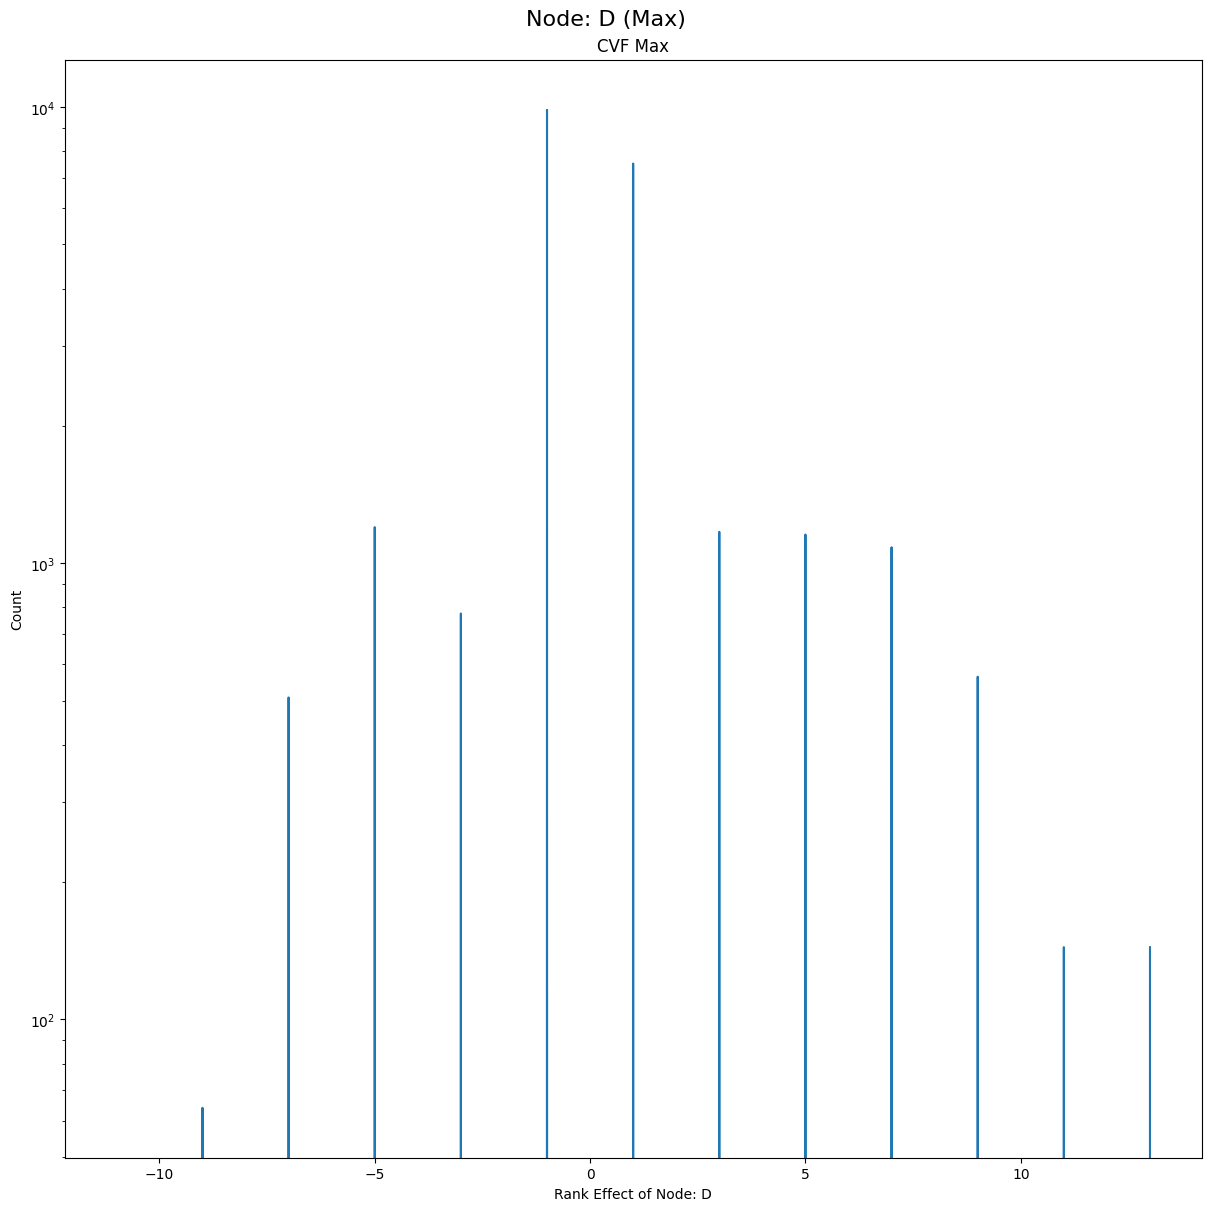

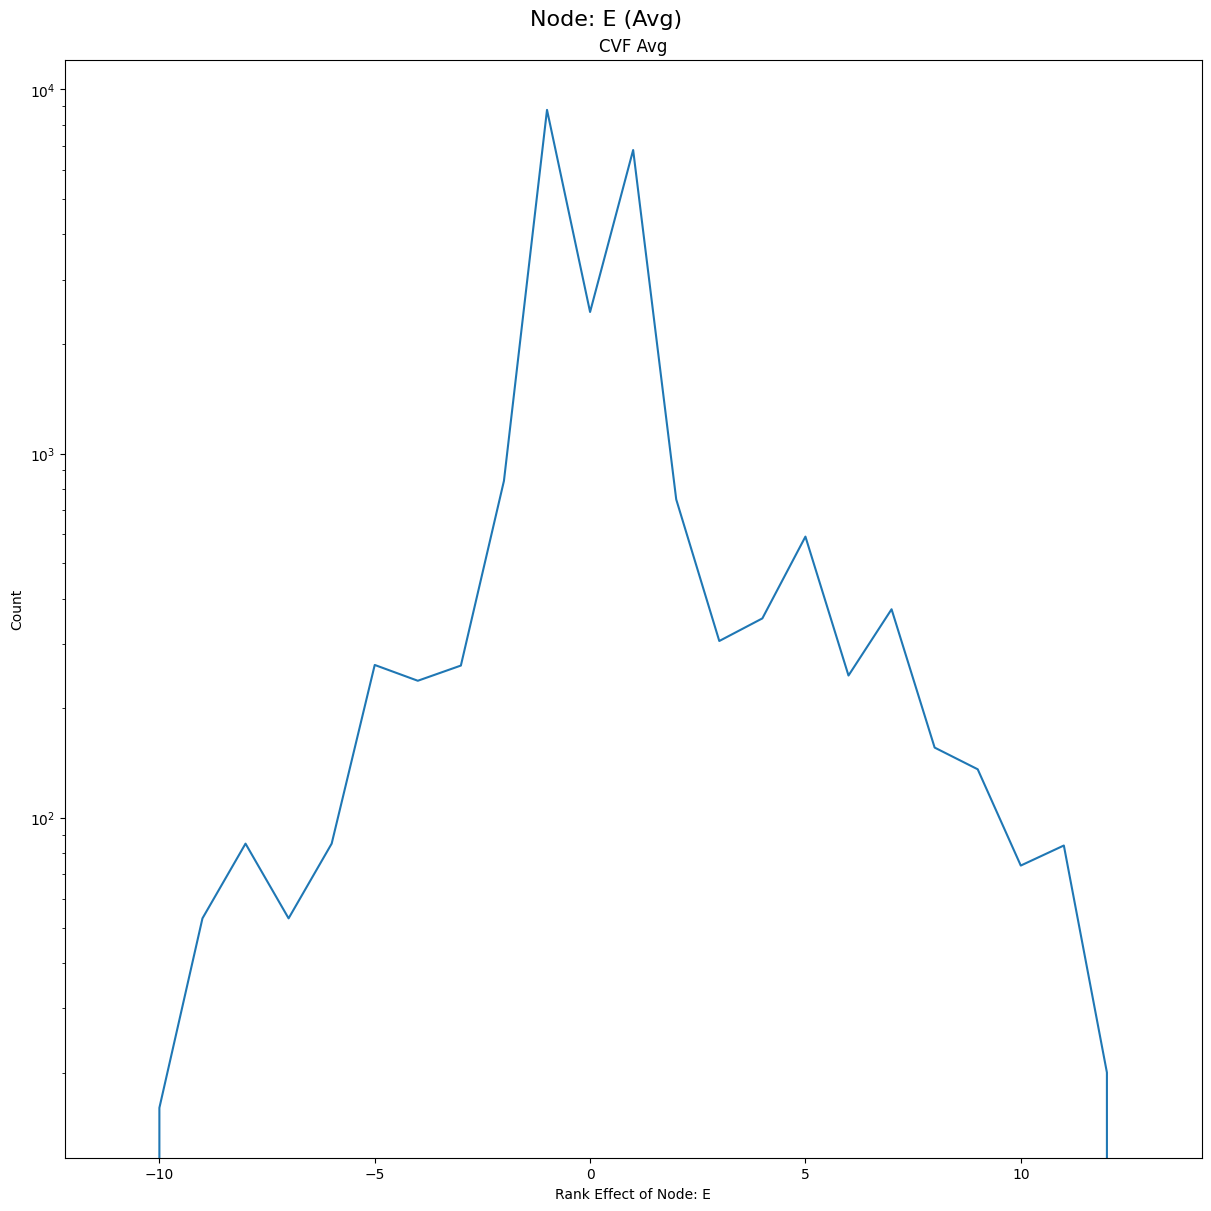

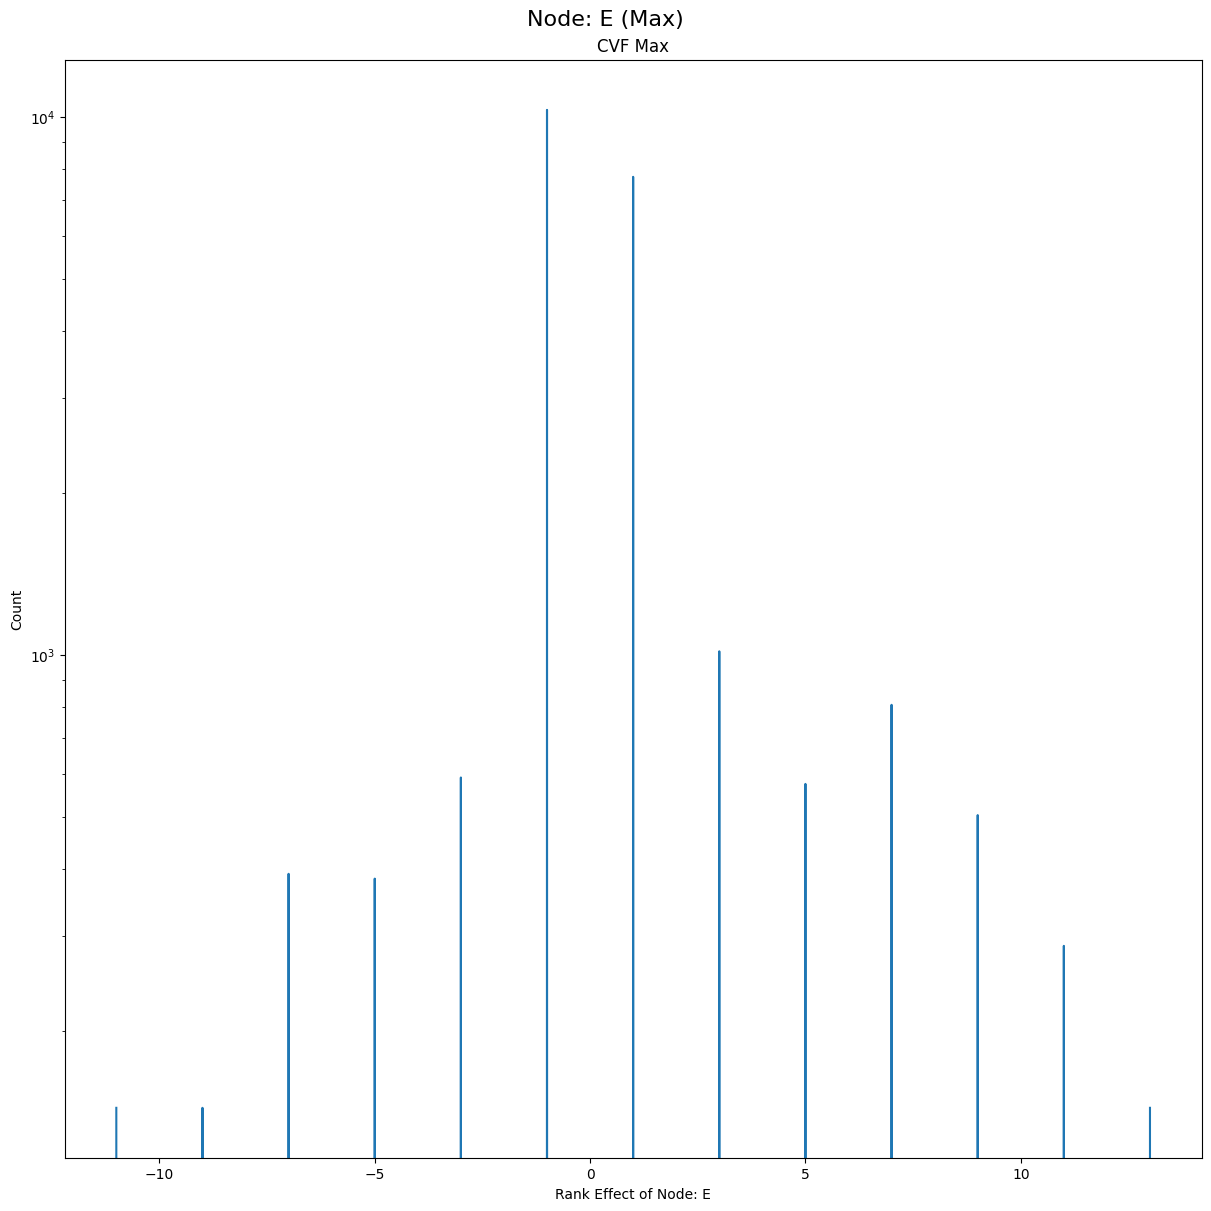

In [9]:
graph = graphs[0]
df = get_df(graph)
node_grps = df.groupby(['Node'])

for i, (index, grp) in enumerate(node_grps):
    for j in range(2):
        fig, axs = plt.subplots(1, 1, figsize=(12, 12), constrained_layout=True)
        if j == 0:
            fig.suptitle(f'Node: {index[0]} (Avg)', fontsize=16)
            plot_node_rank_effect(index[0], grp, axs)
        else:
            fig.suptitle(f'Node: {index[0]} (Max)', fontsize=16)
            plot_node_rank_effect_max(index[0], grp, axs)
    # break